<a href="https://colab.research.google.com/github/JPinzon91/phdStudents-dataAnalysis/blob/main/QS_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Challenge
## Analyzing the factors contributing to sleep disorders in PhD candidates

The goal is informing how academic workloads and routines may be impacting student well-being—particularly among PhD candidates.


## 📌 Table of Contents
1. [Data Understanding](#data-understanding)
2. [Data Cleaning & Preprocessing](#data-cleaning-preprocessing)
3. [Data Reports](#data-reports)
4. [Data Visualization](#data-visualization)
5. [Observations](#observations)

---





# 1. 📊 Data Understanding <a name="data-understanding"></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Part A - Load Dataset
# Import data from directory
def import_data (path):
    dataframe_0 = pd.read_csv(path, keep_default_na=False, na_values=["",''])
    return dataframe_0

path = '/content/data_analyst_coding_challenge_data.csv' #Replace with your file
dataframe_0 = import_data(path)

In [ ]:
# Part B - Calculates the percentage of nulls values for the desire column
def get_null_percentage (column_name):
    totalNulls = dataframe_0[column_name].isnull().sum()
    percentage = (totalNulls / len(dataframe_0[column_name])) * 100

    return round(percentage,2)

columnName = 'Age'
percentage = get_null_percentage(columnName)
columnNulls = {
      'column_name' : [columnName],
      'null_percentage' : [percentage]
      }
dataframe_1 = pd.DataFrame(columnNulls)
print(dataframe_1)

  column_name  null_percentage
0         Age             0.53


In [ ]:
# Part C - Statistical metrics for numeric columns
def statistical_metrics ():
    dataStatistics = dataframe_0.select_dtypes(include=np.number)
    mean = dataStatistics.mean()
    median = dataStatistics.median()
    standardDev = dataStatistics.std()
    percentile_20 = dataStatistics.quantile(0.2)
    percentile_55 = dataStatistics.quantile(0.55)
    percentile_90 = dataStatistics.quantile(0.9)

    rename = [
        'mean', 'median', 'standard_deviation',
        'percentile_20', 'percentile_55', 'percentile_90'
        ]

    dataframe_2 = pd.concat([
        mean,median,standardDev,
        percentile_20,percentile_55,percentile_90],
        axis=1
        )

    dataframe_2.columns = rename
    return dataframe_2

print(statistical_metrics())

                                mean  median  standard_deviation  \
Person ID                 187.500000   187.5          108.108742   
Age                        42.137097    42.5            8.652315   
Sleep Duration              7.132086     7.2            0.795657   
Quality of Sleep            7.312834     7.0            1.196956   
Physical Activity Level    59.171123    60.0           20.830804   
Stress Level                5.391421     5.0            1.772590   
Heart Rate                 70.165775    70.0            4.135676   
Daily Steps              6816.844920  7000.0         1617.915679   

                         percentile_20  percentile_55  percentile_90  
Person ID                         75.6         206.15          336.7  
Age                               33.0          43.00           54.0  
Sleep Duration                     6.3           7.20            8.2  
Quality of Sleep                   6.0           8.00            9.0  
Physical Activity Level         

In [ ]:
# Part D - Determine Unique Count, Most Frequent and Least Frequent elements
def string_counting ():
    """ Calculates the number of unique values, identifies the most frequent values
        and the least frequent values for each attribute"""
    dataCounting = dataframe_0.select_dtypes(include=object)
    unique_count = dataCounting.nunique()

    valuesCount = dataCounting.apply(pd.Series.value_counts)
    most_frequent_element = valuesCount.idxmax()
    least_frequent_element = valuesCount.idxmin()

    rename = [
        'unique_count', 'most_frequent_element', 'least_frequent_element'
        ]

    dataframe_3 = pd.concat([
        unique_count, most_frequent_element, least_frequent_element],
        axis=1
        )

    dataframe_3.columns = rename
    return dataframe_3

print(string_counting())

                unique_count most_frequent_element least_frequent_element
Gender                     2                  Male                 Female
Occupation                11                 Nurse                Manager
BMI Category               4                Normal                  Obese
Blood Pressure            25                130/85                 118/76
Sleep Disorder             3                  None               Insomnia


# 2. 🧼 Data Cleaning & Preprocessing <a name="data-cleaning-preprocessing"></a>


In [ ]:
# Part A - Splitting Blood Pressure to two columns (Blood Pressure High & Blood Pressure Low)
bloodSplit = dataframe_0['Blood Pressure'].str.split(pat="/", expand=True)
dataframe_0['Blood Pressure High'] = bloodSplit[0].astype(int)
dataframe_0['Blood Pressure Low'] = bloodSplit[1].astype(int)
dataframe_0.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure High,Blood Pressure Low
0,1,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None,126,83
1,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None,125,80
2,3,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None,125,80
3,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
# Part B - Index Refactor
# Defining the new user ID following the foramt YYYYY-ZZZ
def get_new_index (person_id, gender, occupation):

  #YYYYY is calculated by taking the 5 decimal values from the PersonID * PI (π)
    np.pi
    piPersonId = person_id * np.pi
    newPersonId = str(int((piPersonId % 1) * 100000))
    occupationMod = occupation.split()

# Validate if the Occupation has more than 1 word
    if len(occupationMod) < 2:
        newPersonId = (newPersonId
                       + '-'
                       + gender[0]
                       + occupationMod[0][0])
    else:
        newPersonId = (newPersonId
                       + '-'
                       + gender[0]
                       + occupationMod[0][0]
                       + occupationMod[1][0])

    return newPersonId

dataframe_0['Person ID'] = dataframe_0.apply(lambda row: get_new_index(
                                            row['Person ID'], row['Gender'],
                                            row['Occupation']), axis=1
                                            )
dataframe_0.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure High,Blood Pressure Low
0,14159-MSE,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None,126,83
1,28318-MD,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None,125,80
2,42477-MD,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None,125,80
3,56637-MSR,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea,140,90
4,70796-MSR,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
 # Part C - Imputation Method - The Method used was Frequent Category Imputation

 """The Imputation Method replaces nulls using the Frequent Category Imputation
       if null percentage is less or equal to 2.5% otherwise it drops the column"""
def imputation_method ():
    global dataframe_0
    for i in dataframe_0.columns:
        if get_null_percentage(i) <= 2.5:
            if (i in statistical_metrics().index) and i != 'Person ID':

              #Replace the Null values with the median from the statistical_metrics function
                dataframe_0[i] = dataframe_0[i].fillna(int(statistical_metrics()['median'][i]))
            elif i in string_counting().index:

              #Replace the Null values with the most_frequent_elements from the string_counting function
                dataframe_0[i] = dataframe_0[i].fillna(string_counting()['most_frequent_element'][i])
        else:
            dataframe_0 = dataframe_0.drop(i)
    return

imputation_method()
dataframe_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    object 
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    float64
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    float64
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Blood Pressure High      374 non-null    int64  
 14  Blood Pressure Low       3

In [ ]:
# Part D - Add a new feature derived from the existing attributes - Blood Pressure Category

""" Categorize the Blood Pressure for each patient to ease the future analysis, while identifying causes that triggers
    Sleep Disorders checking the Blood Pressure type would be easier to recognize for non-medical users in the analysis.
    The Blood Pressure can be defined as Normal, Elevated, Stage 1 Hypertension, Stage 2 Hypertension
    and Hypertension Crisis"""

def get_blood_pressure_category(bpHigh, bpLow):
    bpCategory = ''

    # Values defined by the American Heart Association
    if bpHigh < 120 and bpLow < 80:
        bpCategory = 'Normal'
    elif (120 <= bpHigh <= 129) and bpLow < 80:
        bpCategory = 'Elevated'
    elif (130 <= bpHigh <= 139) or (80 <= bpLow <= 89):
        bpCategory = 'Stage 1 Hypertension'
    elif 140 <= bpHigh <= 180 or 90 <= bpLow <= 120:
        bpCategory = 'Stage 2 Hypertension'
    else:
        bpCategory = 'Hypertension Crisis'

    return bpCategory

dataframe_0['Blood Pressure Category'] = dataframe_0.apply(lambda row: get_blood_pressure_category(
                                                          row['Blood Pressure High'], row['Blood Pressure Low']),
                                                          axis=1
                                                          )
dataframe_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    object 
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    float64
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    float64
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Blood Pressure High      374 non-null    int64  
 14  Blood Pressure Low       3

## Imputation Method Approach
I decided to use the Frequent Category Imputation method based on

**Assumptions**

*   Data was missing at random.
*   There is a high probability that the missing data looks like the majority of the data.

**Advantages**

*   We can obtain a complete dataset in very little time.
*   We can use this technique in the production model.

**Disadvantages**

*   May lead to over-representation of a particular category
*   Can distort original variable distribution
*   The higher the percentage of missing values, the higher will be the distortion.

**When to Use**

*   Missing data is not more than 5% - 6% of the dataset
*   Data is missing at random

## Drop Column Implications

**Lost in Information**

*   Might remove columns that contain valuable insights, which could hurt the analysis or model performance.

**Bias Introduction**

*   If dropped columns are related to any variable, their absence can introduce bias.

**Missed Interactions**

* Missing columns could let to lose correlation between variables.

**Data Leakage Risk**

* Columns dropped after data splitting or transformation, leading to inconsistent datasets.





# 3. 📋 Data Reports <a name="data-reports"></a>


In [ ]:
# Part A - What is the occupation that sleep the least for men?
sleepOcuppation_byMen = dataframe_0[dataframe_0['Gender'] == 'Male'].groupby(['Gender','Occupation'])['Sleep Duration'].mean()
#print(sleepOcuppation_byMen)
print('Based on in-depth analysis '
      + sleepOcuppation_byMen.idxmin()[1]
      + ' is the occupation that sleep the least for men.')

Based on in-depth analysis Sales Representative is the occupation that sleep the least for men.


In [ ]:
# Part B - Which gender is more prone to suffer from overweight and have sleep diseases: men or women?
overweightProne_sd = dataframe_0[(dataframe_0['BMI Category'] == 'Overweight')
                                  & (dataframe_0['Sleep Disorder'] != 'None')]
overweightProne_sd = overweightProne_sd.groupby(['Gender', 'BMI Category'])['Sleep Disorder'].count()
#print(overweightProne_sd)
print(overweightProne_sd.idxmax()[0]
      + ' are more prone to suffer any type of sleep disorder from overweight.')

Female are more prone to suffer any type of sleep disorder from overweight.


In [ ]:
# Part C - What is the average blood pressure for people suffering from sleep diseases?
bpSleepDisorder = dataframe_0[(dataframe_0['Sleep Disorder'] != 'None')]
bpHigh = int(bpSleepDisorder['Blood Pressure High'].mean())
bpLow = int(bpSleepDisorder['Blood Pressure Low'].mean())
bpCategory = get_blood_pressure_category(bpHigh, bpLow)
print('The average Blood Pressure for people suffering from sleep disorder is: '
      + str(bpHigh)
      + '/'
      + str(bpLow)
      + ', categorized as '
      + bpCategory)

The average Blood Pressure for people suffering from sleep disorder is: 134/89, categorized as Stage 1 Hypertension


In [ ]:
# Part D - What is the top 1 occupation for women that suffers no sleep diseases, with a quality sleep of above 7.5?
top1Women_noDisorder = dataframe_0[(dataframe_0['Sleep Disorder'] == 'None')
                                    & (dataframe_0['Quality of Sleep'] > 7.5)
                                    & (dataframe_0['Gender'] == 'Female')]
top1Women_noDisorder = top1Women_noDisorder.groupby('Occupation')['Sleep Duration'].mean()
#print(top1Women_noDisorder)
print('The Top 1 occupation in Women with Sleep Quality above 7.5 is '
      + top1Women_noDisorder.idxmax())

The Top 1 occupation in Women with Sleep Quality above 7.5 is Engineer


# 4. 📊 Data Visualization <a name="data-visualization"></a>


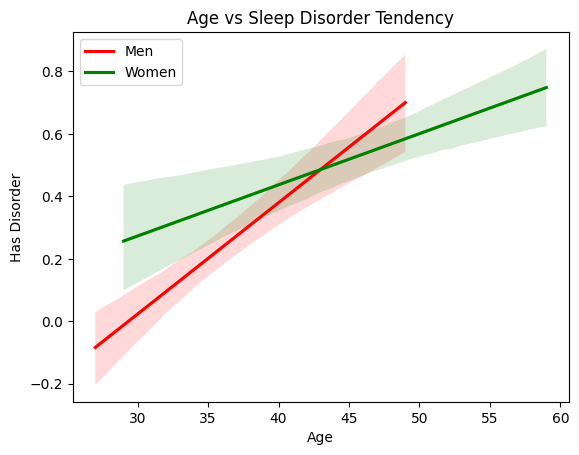

In [ ]:
#Part A  visual that links the age and the tendency to have some sleep disorder.
genderAgeDisorder = dataframe_0
genderAgeDisorder['Has Disorder'] = genderAgeDisorder['Sleep Disorder'].apply(lambda x: 0 if x == 'None' else 1)
sns.regplot(data=genderAgeDisorder[genderAgeDisorder['Gender'] == 'Male'], x = 'Age', y = 'Has Disorder', color = 'red', label = "Men", scatter=False)
sns.regplot(data=genderAgeDisorder[genderAgeDisorder['Gender'] == 'Female'], x = 'Age', y = 'Has Disorder', color = 'green', label = "Women", scatter=False)
plt.title('Age vs Sleep Disorder Tendency')
plt.legend()
plt.show()

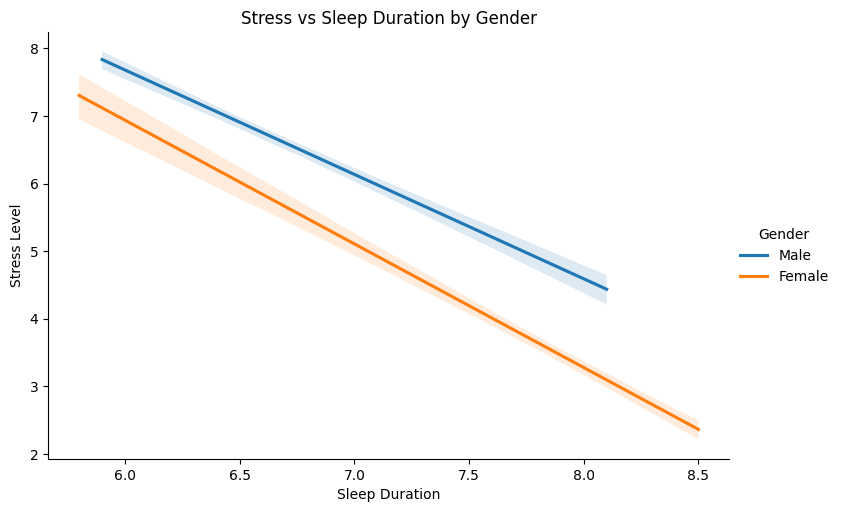

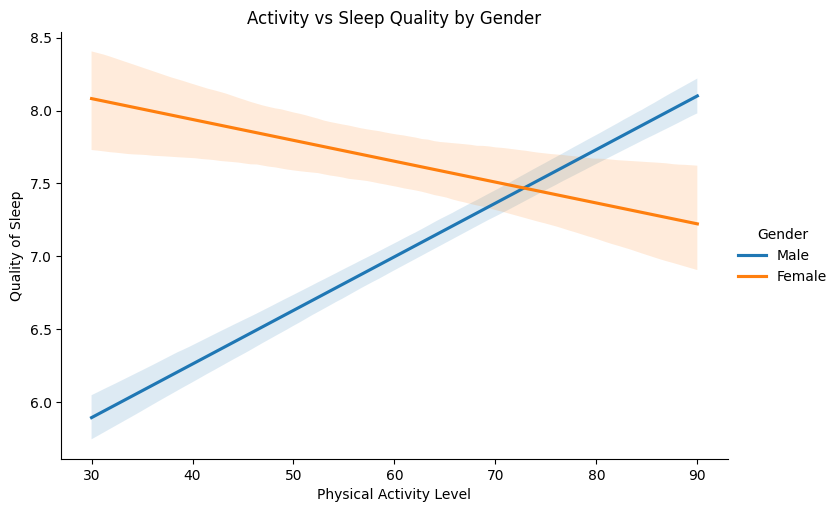

In [ ]:
# Part C - Variable affecting sleep (explain + plot)
# Stress Level vs Slee Duration, Activity vs Sleep Quality
sns.lmplot(data=dataframe_0, x='Sleep Duration', y='Stress Level', hue='Gender', aspect=1.5, scatter=False)
plt.title('Stress vs Sleep Duration by Gender')
plt.show()
print(" ")
sns.lmplot(data=dataframe_0, x='Physical Activity Level', y='Quality of Sleep', hue='Gender', aspect=1.5, scatter=False)
plt.title('Activity vs Sleep Quality by Gender')
plt.show()

Choosing Stress Level and Physical Activity as factors likely to affect sleep. As expected, the plot shows that higher stress is linked to lower sleep duration, particularly among males. In contrast, physical activity has a positive correlation with sleep quality, with women slightly outperforming men in the higher activity range.

In [ ]:
# Part D - Correlation between Gender, Occupation, Sleep Disorder
sunburst_data = (dataframe_0[dataframe_0['Sleep Disorder'] != 'None'].groupby(['Gender', 'Occupation', 'Sleep Disorder'])
                                                                     .size()
                                                                     .reset_index(name='Count'))
sunburst_data = sunburst_data[sunburst_data['Count'] > 1]
fig = px.sunburst(
    sunburst_data,
    path=['Gender', 'Occupation', 'Sleep Disorder'],
    values='Count',
    color='Gender',
    title='Sleep Disorders by Gender and Occupation'
)

fig.update_layout(
    margin = dict(t=4, l=4, r=4, b=4)
)
fig.show()

This sunburst chart shows how sleep disorder are distributed across gender and occupation. We can clearly see that certation occupation (e.g "Accountant" and "Teacher") are highly associated to Insomnia in Women, while Men in roles like "Doctor" and "Lawyer" lean toward sleep apnea.

This type of multi-variable visualization helps surface targeted wellbeing insights by segment.


# 5. ✅ Observations <a name="observations"></a>

In [ ]:
# Observation 1
qualityOccupationTop3 = (dataframe_0.groupby(['Occupation'])[['Quality of Sleep','Daily Steps']]
                         .mean()
                         .nlargest(3, 'Quality of Sleep'))

print(qualityOccupationTop3.sort_values(by=['Quality of Sleep'], ascending=False))

            Quality of Sleep  Daily Steps
Occupation                               
Engineer            8.412698  5980.952381
Lawyer              7.893617  7661.702128
Accountant          7.891892  6881.081081


The Top 3 Occupations with the best sleep quality alre report over 5500 daily steps suggesting physical activity may positively impact sleep.

In [ ]:
# Observation 2
sleepDisorderBpCategory = (dataframe_0.groupby(['Sleep Disorder', 'Blood Pressure Category'])['Person ID']
                           .size()
                           .reset_index(name="Count"))

print(sleepDisorderBpCategory.sort_values(by=['Count'], ascending=False))

  Sleep Disorder Blood Pressure Category  Count
5           None    Stage 1 Hypertension    174
1       Insomnia    Stage 1 Hypertension     71
9    Sleep Apnea    Stage 2 Hypertension     61
4           None                  Normal     39
8    Sleep Apnea    Stage 1 Hypertension     16
6           None    Stage 2 Hypertension      5
2       Insomnia    Stage 2 Hypertension      5
0       Insomnia                  Normal      1
3           None                Elevated      1
7    Sleep Apnea                  Normal      1


The Blood Pressure condition with most cases among the patients is Stage 1 Hypertension with 255 cases even for people unaffected by any Sleep Disorder, suggesting that Blood Pressure is not a factor that influence sleep.

In [ ]:
sleepDisorderByBMI = dataframe_0.groupby(['Sleep Disorder'])['Physical Activity Level'].mean()

print(sleepDisorderByBMI)

Sleep Disorder
Insomnia       46.818182
None           57.949772
Sleep Apnea    74.794872
Name: Physical Activity Level, dtype: float64


People with high physical activity level (75 point) may suffer from Sleep Apnea contrary to the levels shwon by people not affected by any sleep disorder.